In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("PUBG_Game_Prediction_data.csv")
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [26]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [27]:
data.shape

(4446966, 29)

In [28]:
data.groupId.nunique()

2026745

In [29]:
data.matchId.nunique()

47965

In [30]:
plt.rcParams['figure.figsize'] = (16, 6)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import catboost as cb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df = data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [32]:
df.dropna(inplace=True)

In [33]:
df.shape

(4446965, 29)

In [34]:
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

In [35]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0.7755,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.0000,0,0.00,0,0,202.70,3,0,0.1667,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0.1875,97


75       1650
76       1672
77       2079
78       4212
79       4503
80       4480
81       7614
82       8118
83      13778
84      19488
85      23035
86      37496
87      47154
88      67320
89      94251
90     138960
91     183001
92     260544
93     339264
94     432118
95     531525
96     591840
97     589275
98     543214
99     301653
100    141400
Name: playersJoined, dtype: int64


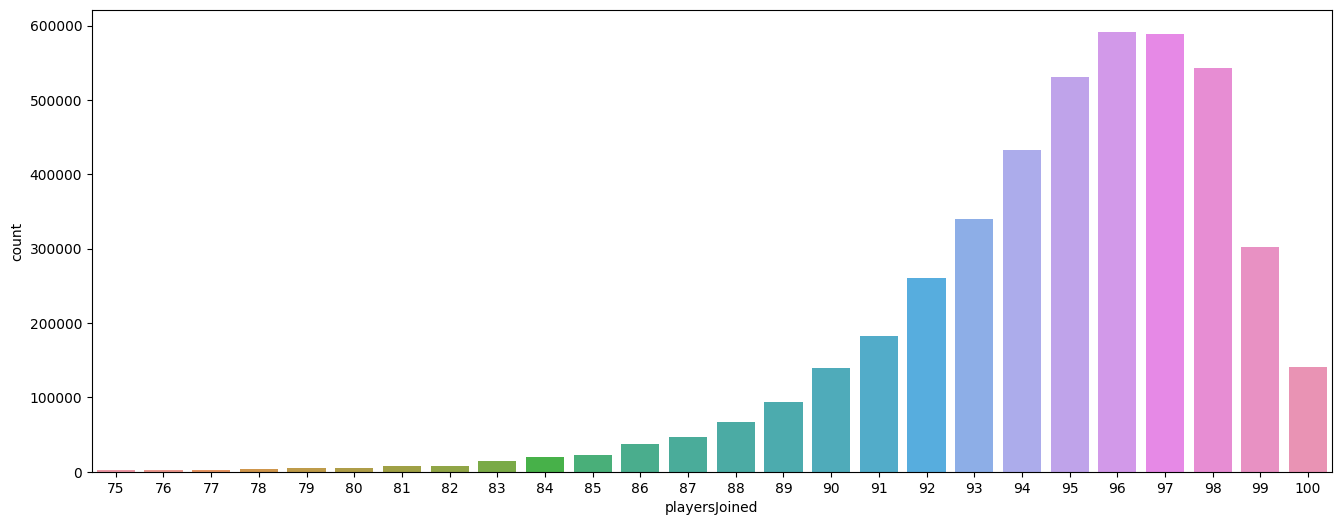

In [36]:
print(df[df['playersJoined']>=75]['playersJoined'].value_counts().sort_index())
sns.countplot(x='playersJoined', data=df[df['playersJoined']>=75])
plt.show()

##### Kills without moving

In [38]:
df ['totalDistance'] = df['rideDistance']+df['walkDistance']+df['swimDistance']

df['killsWithoutMoving'] = (df['kills']>0) & (df['totalDistance']==0)

In [39]:
df[df['killsWithoutMoving'] == True].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,totalDistance,killsWithoutMoving
1824,b538d514ef2476,0eb2ce2f43f9d6,35e7d750e442e2,0,0,593.0,0,0,3,18,...,0.0,0,0,0.0,8,0,0.8571,58,0.0,True
6673,6d3a61da07b7cb,2d8119b1544f87,904cecf36217df,2,0,346.6,0,0,6,33,...,0.0,0,0,0.0,22,0,0.6000,42,0.0,True
11892,550398a8f33db7,c3fd0e2abab0af,db6f6d1f0d4904,2,0,1750.0,0,4,5,3,...,0.0,0,0,0.0,13,0,0.8947,21,0.0,True
14631,58d690ee461e9d,ea5b6630b33d67,dbf34301df5e53,0,0,157.8,0,0,0,69,...,0.0,0,0,0.0,7,1500,0.0000,73,0.0,True
15591,49b61fc963d632,0f5c5f19d9cc21,904cecf36217df,0,0,100.0,0,1,0,37,...,0.0,0,0,0.0,10,0,0.3000,42,0.0,True


In [40]:
df.drop(df[df['killsWithoutMoving'] == True].index,inplace=True)
# this will drop hackers/anomalies

In [42]:
df.shape

(4445430, 32)

##### Extra-ordinary Road Kills??? and so many kills???

In [43]:
df.drop(df[df['roadKills']>5].index,inplace=True)

Text(0.5, 1.0, 'distribution of kills')

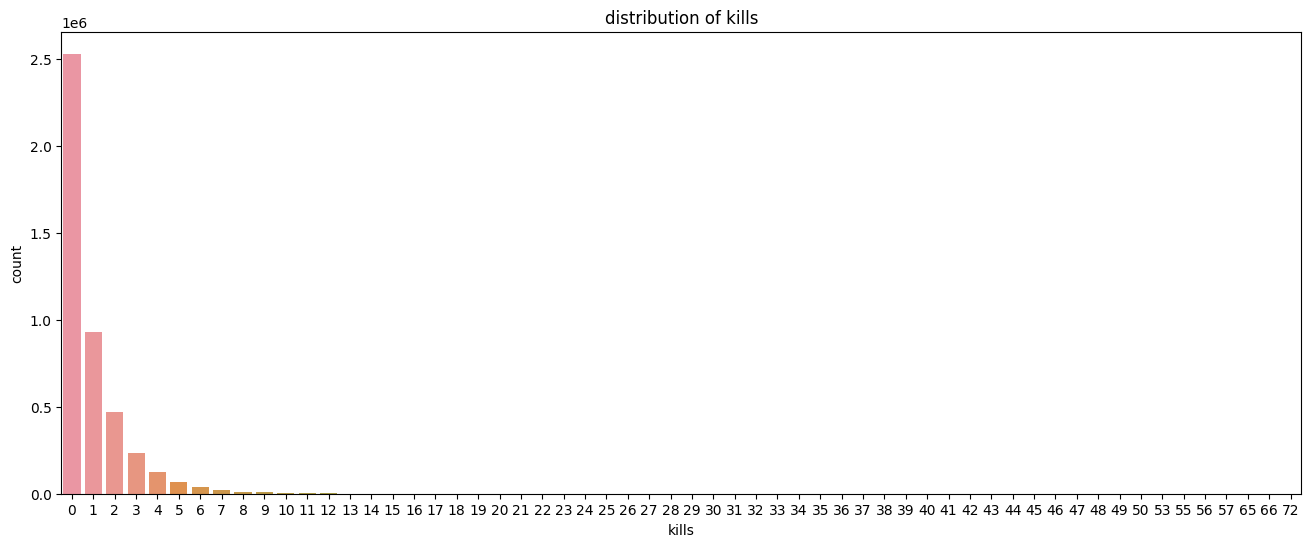

In [44]:
sns.countplot(data = df,x=df['kills']).set_title('distribution of kills')

Text(0.5, 1.0, 'distribution of kills')

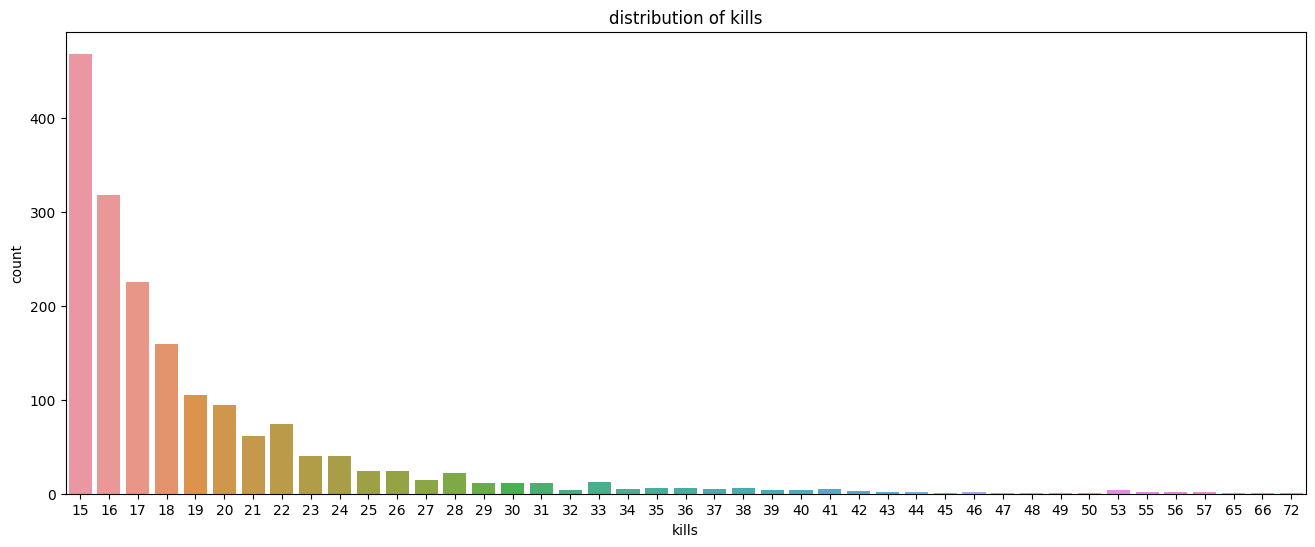

In [46]:
sns.countplot(data = df[df['kills']>=15],x='kills').set_title('distribution of kills')

In [47]:
df.drop(df[df['kills']>20].index, inplace=True)

##### headshot rate

In [48]:
df['headshot_rate'] = df['headshotKills'] / df['kills']
df['headshot_rate'] = df['headshot_rate'].fillna(0)

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_16020\3346338100.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")


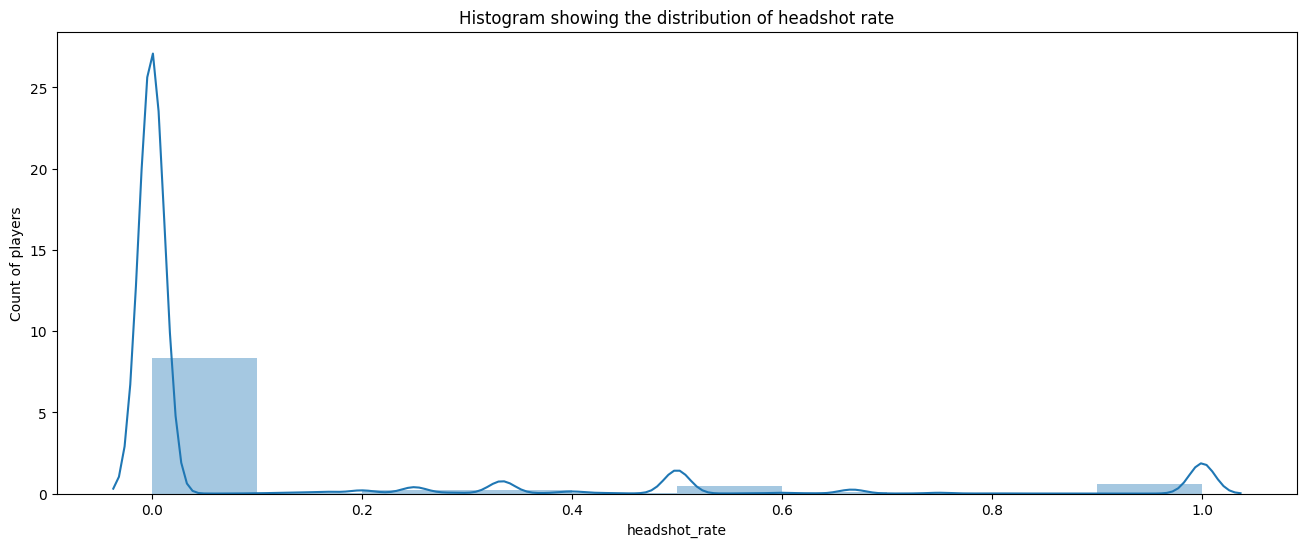

In [53]:
sns.distplot(df['headshot_rate'], bins =10).set_title("Histogram showing the distribution of headshot rate")
plt.ylabel("Count of players")
plt.show()

In [54]:
df[(df['headshot_rate'] == 1) & (df['kills'] > 5)].shape

(187, 33)

In [55]:
df.drop(df[(df['headshot_rate'] == 1) & (df['kills'] > 5)].index, inplace=True)

#### Longest Show

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_16020\2625100198.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['longestKill'], bins =50).set_title('Histogram of Longest Kill Distribution')


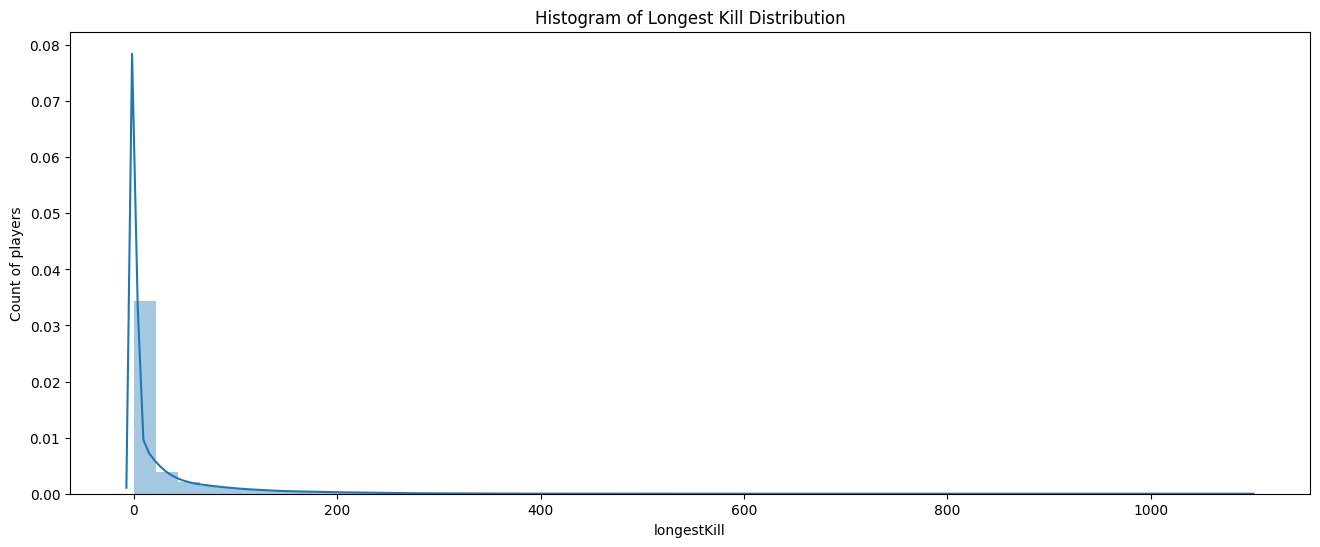

In [56]:
sns.distplot(df['longestKill'], bins =50).set_title('Histogram of Longest Kill Distribution')
plt.ylabel('Count of players')
plt.show()

In [57]:
df.drop(df[df['longestKill'] >= 500].index, inplace=True)

##### Weapon change

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_16020\3581409688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weaponsAcquired'],bins=100).set_title('Weapons Acquired')


Text(0.5, 1.0, 'Weapons Acquired')

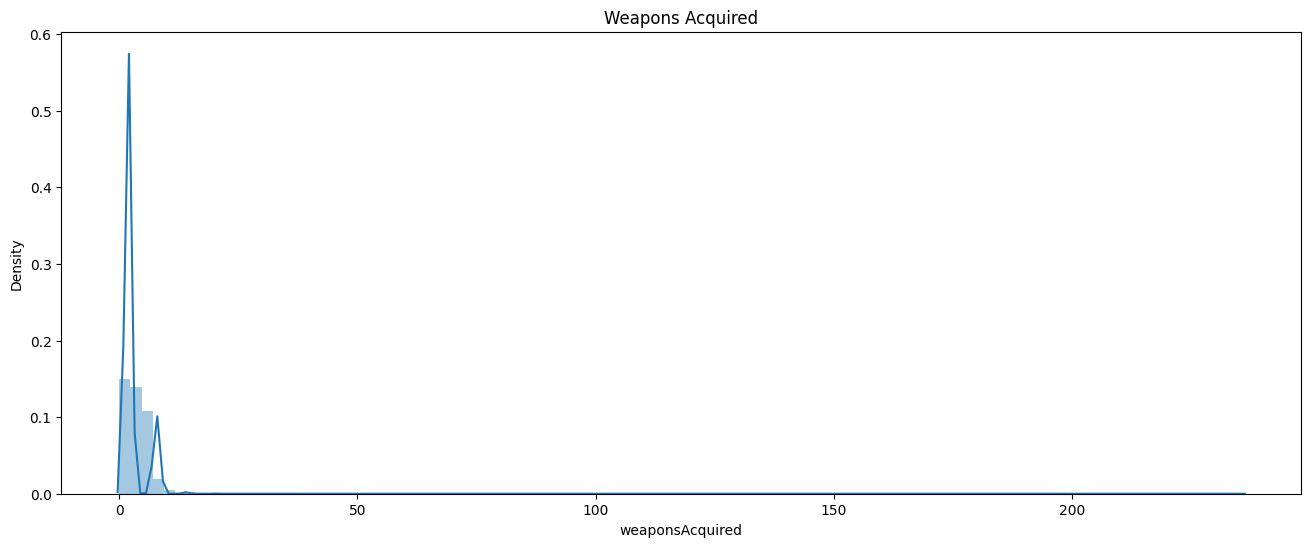

In [58]:
sns.distplot(df['weaponsAcquired'],bins=100).set_title('Weapons Acquired')

In [59]:
df.drop(df[df['weaponsAcquired'] >= 15].index, inplace=True)

In [60]:
df.shape

(4436233, 33)

C:\Users\ANURAG\AppData\Local\Temp\ipykernel_16020\752600138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


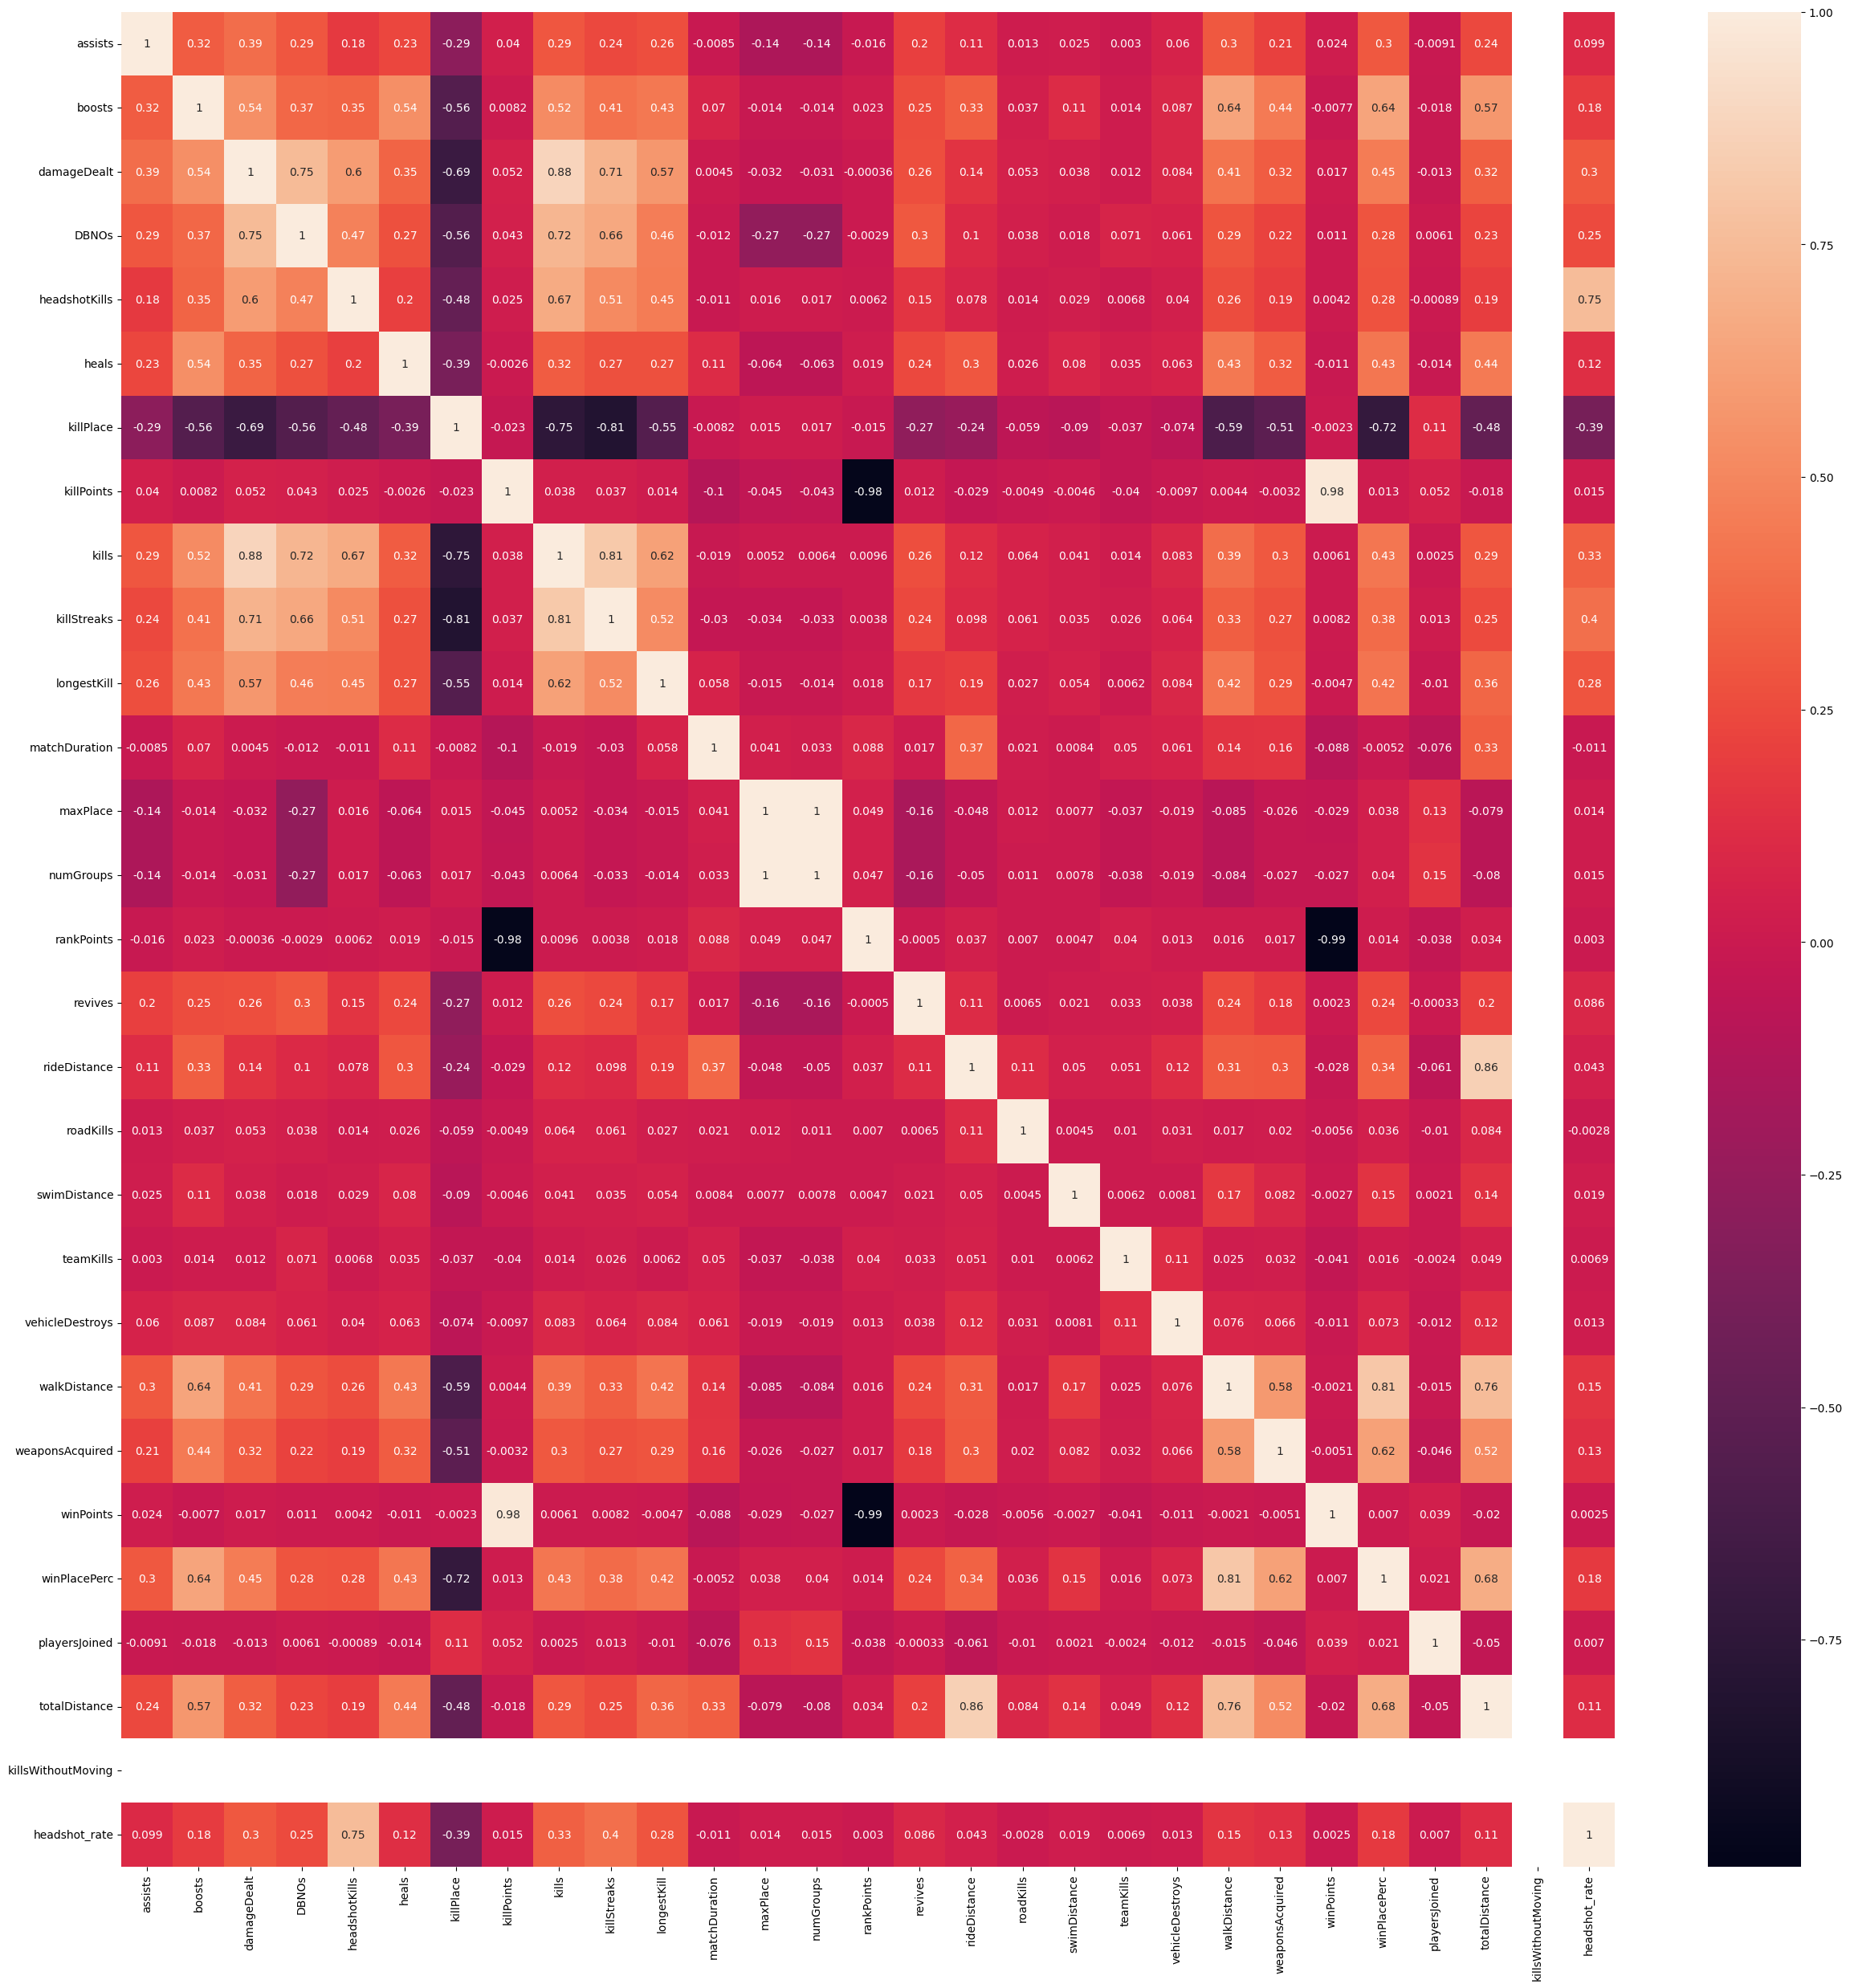

In [61]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Feature Engineering

In [62]:
normalising_factor = (100 - df['playersJoined']/100)+1
normalising_factor

0          100.04
1          100.09
2          100.02
3          100.09
4          100.03
            ...  
4446961    100.06
4446962    100.07
4446963    100.02
4446964    100.06
4446965    100.02
Name: playersJoined, Length: 4436233, dtype: float64

In [63]:
df['killsNorm'] = df['kills']*normalising_factor
df['damageDealtNorm'] = df['damageDealt']*normalising_factor
df['maxPlaceNorm'] = df['maxPlace']*normalising_factor
df['matchDurationNorm'] = df['matchDuration']*normalising_factor

df['travelDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
df['healsnboosts'] = df['heals'] + df['boosts']
df['assist'] = df['assists'] + df['revives']

df.drop(['Id','groupId','matchId','kills','damageDealt','maxPlace','matchDuration','rideDistance','walkDistance','swimDistance','heals','boosts','assists','revives'], inplace=True, axis=1)

In [64]:
df.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,matchType,numGroups,rankPoints,roadKills,...,totalDistance,killsWithoutMoving,headshot_rate,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,travelDistance,healsnboosts,assist
0,0,0,60,1241,0,0.00,squad-fpp,26,-1,0,...,244.8000,False,0.0,0.00,0.0000,2801.12,130652.24,244.8000,0,0
1,0,0,57,0,0,0.00,squad-fpp,25,1484,0,...,1445.0445,False,0.0,0.00,9155.2323,2602.34,177859.93,1445.0445,0,0
2,0,0,47,0,0,0.00,duo,47,1491,0,...,161.8000,False,0.0,0.00,6801.3600,5001.00,131826.36,161.8000,0,1
3,0,0,75,0,0,0.00,squad-fpp,30,1408,0,...,202.7000,False,0.0,0.00,3292.9610,3102.79,143729.24,202.7000,0,0
4,0,0,45,0,1,58.53,solo-fpp,95,1560,0,...,49.7500,False,0.0,100.03,10003.0000,9702.91,142442.72,49.7500,0,0


## ML - Catboost Model

In [77]:
x = df.drop(['winPlacePerc'], axis=1)
y = df['winPlacePerc']
x.columns


Index(['DBNOs', 'headshotKills', 'killPlace', 'killPoints', 'killStreaks',
       'longestKill', 'matchType', 'numGroups', 'rankPoints', 'roadKills',
       'teamKills', 'vehicleDestroys', 'weaponsAcquired', 'winPoints',
       'playersJoined', 'totalDistance', 'killsWithoutMoving', 'headshot_rate',
       'killsNorm', 'damageDealtNorm', 'maxPlaceNorm', 'matchDurationNorm',
       'travelDistance', 'healsnboosts', 'assist'],
      dtype='object')

In [78]:
features = x.columns
x = pd.get_dummies(x, columns=['matchType','killsWithoutMoving'])
x.head()

,DBNOs,headshotKills,killPlace,killPoints,killStreaks,longestKill,numGroups,rankPoints,roadKills,teamKills,...,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp,killsWithoutMoving_False
0,0,0,60,1241,0,0.00,26,-1,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,57,0,0,0.00,25,1484,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,47,0,0,0.00,47,1491,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,75,0,0,0.00,30,1408,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,45,0,1,58.53,95,1560,0,0,...,0,0,0,0,0,0,1,0,0,1


In [80]:
print(x.shape)
features = x.columns

(4436233, 40)


In [67]:
df['matchType'].value_counts()

squad-fpp           1754740
duo-fpp              996001
squad                625292
solo-fpp             536212
duo                  313185
solo                 181456
normal-squad-fpp      13073
crashfpp               6274
normal-duo-fpp         5003
flaretpp               2497
normal-solo-fpp         845
flarefpp                717
crashtpp                367
normal-squad            305
normal-duo              144
normal-solo             122
Name: matchType, dtype: int64

In [68]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x))

In [69]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.3,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(3105363, 40) (1330870, 40) (3105363,) (1330870,)


In [70]:
train_dataset = cb.Pool(xtrain,ytrain)
test_dataset = cb.Pool(xtest,ytest)

model = cb.CatBoostRegressor(loss_function='RMSE')

In [71]:
# GRID Search
grid = {'iterations':[100,150],
        'learning_rate':[0.3,0.1],
        'depth':[2,4,6,8]}

model.grid_search(grid,train_dataset)

0:	learn: 0.4128485	test: 0.4132872	best: 0.4132872 (0)	total: 372ms	remaining: 36.8s
1:	learn: 0.3117140	test: 0.3120439	best: 0.3120439 (1)	total: 561ms	remaining: 27.5s
2:	learn: 0.2448623	test: 0.2451505	best: 0.2451505 (2)	total: 740ms	remaining: 23.9s
3:	learn: 0.2018662	test: 0.2021299	best: 0.2021299 (3)	total: 895ms	remaining: 21.5s
4:	learn: 0.1758607	test: 0.1760870	best: 0.1760870 (4)	total: 1.06s	remaining: 20.2s
5:	learn: 0.1593178	test: 0.1595440	best: 0.1595440 (5)	total: 1.24s	remaining: 19.4s
6:	learn: 0.1500515	test: 0.1502687	best: 0.1502687 (6)	total: 1.39s	remaining: 18.5s
7:	learn: 0.1433813	test: 0.1435814	best: 0.1435814 (7)	total: 1.55s	remaining: 17.8s
8:	learn: 0.1393573	test: 0.1395548	best: 0.1395548 (8)	total: 1.71s	remaining: 17.3s
9:	learn: 0.1362725	test: 0.1364648	best: 0.1364648 (9)	total: 1.86s	remaining: 16.7s
10:	learn: 0.1341619	test: 0.1343603	best: 0.1343603 (10)	total: 2.01s	remaining: 16.2s
11:	learn: 0.1325330	test: 0.1327381	best: 0.1327381

{'params': {'depth': 8, 'iterations': 150, 'learning_rate': 0.3},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [81]:
feature_importance_df = pd.DataFrame()
feature_importance_df['features'] = features
feature_importance_df['importance'] = model.feature_importances_

feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

,features,importance
2,killPlace,42.024114
14,totalDistance,11.921126
20,travelDistance,11.813944
16,killsNorm,7.671632
19,matchDurationNorm,5.282952
13,playersJoined,4.626282
4,killStreaks,4.437291
5,longestKill,4.326992
6,numGroups,2.376826
21,healsnboosts,1.721066


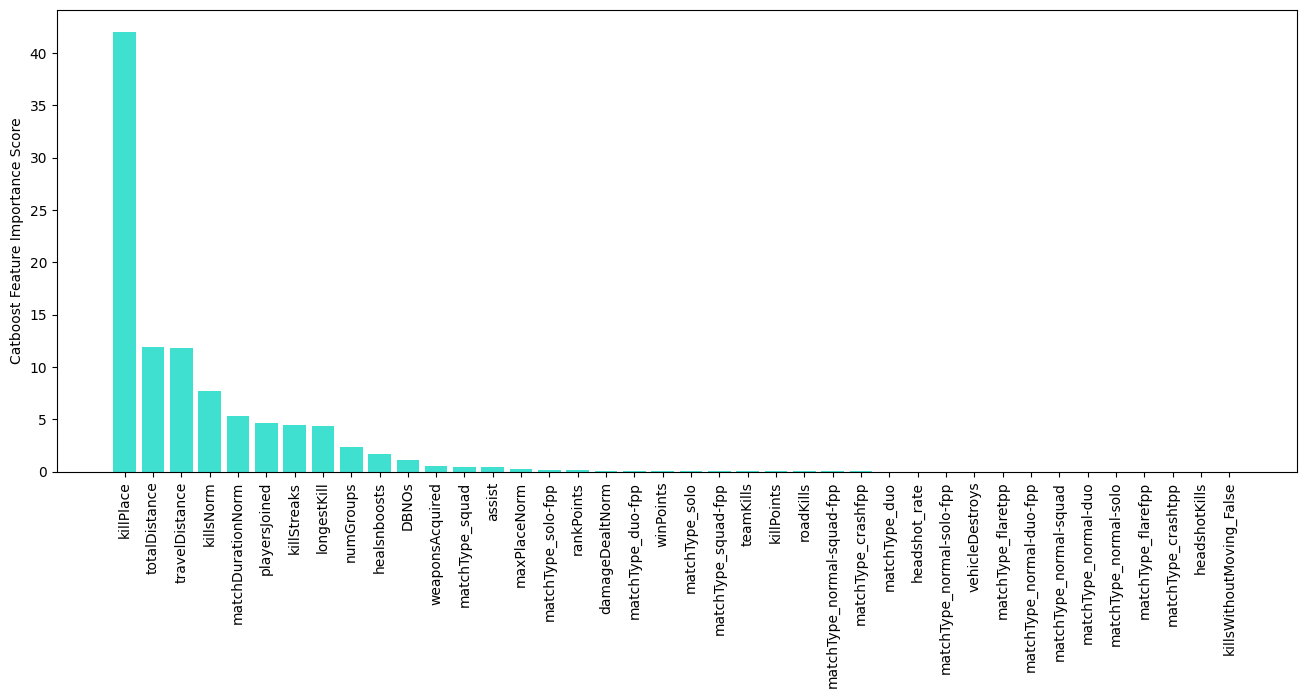

In [82]:
plt.bar(feature_importance_df.features, feature_importance_df.importance, color='turquoise')
plt.ylabel('Catboost Feature Importance Score')
plt.xticks(rotation=90)
plt.show()

In [83]:
pred = model.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, pred))
print("Testing Performance\n")
print("RMSE: {:.2f}".format(rmse))
r2 = r2_score(ytest, pred)
print("R2: {:.2f}".format(r2))

Testing Performance

RMSE: 0.08
R2: 0.93
